# In this exercise, we will perform data analysis in python Pandas and answer the following questions

-To analyse Uber vs Lyft data
-Check the relationships between the Uber/lyft fares and weather

This exercise will demonstrate dealing with multiple pages of data, append multiple dataframe and using Linear regression and machine learning.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
get_ipython().magic(u'matplotlib inline')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#TODOLIST
#load data
#Preprocess data
#Plot data
#Design prediction model

# LOAD DATA

In [3]:
weatherdata = pd.read_csv('C:/Users/markf/Documents/Data_Analysis_training/weather.csv.csv')
weatherdata.head(100)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
95,38.35,Fenway,0.75,996.86,NaN,1543451968,0.70,10.90
96,38.00,Financial District,0.76,996.81,NaN,1543451968,0.71,11.17
97,38.52,Haymarket Square,0.75,996.80,NaN,1543451968,0.69,11.11
98,38.55,North End,0.75,996.80,NaN,1543451968,0.69,11.13


In [4]:
cabrides = pd.read_csv('C:/Users/markf/Documents/Data_Analysis_training/cab_rides.csv')
cabrides.head(100)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
95,2.82,Lyft,1544685910496,West End,Fenway,7.0,1.0,ff49381b-9947-4a40-b100-ca58020e0dbe,lyft_line,Shared
96,2.49,Uber,1544812509357,Back Bay,South Station,25.0,1.0,118a8165-c787-4761-89e5-a17aa5710c75,6c84fd89-3f11-4782-9b50-97c468b19529,Black
97,2.49,Uber,1544952912418,Back Bay,South Station,12.0,1.0,14fd1233-8cea-4061-a66a-9a5ecec07f66,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
98,2.49,Uber,1545102903559,Back Bay,South Station,12.0,1.0,2a98223c-db41-4d28-9f8a-f26775b12fd4,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV


# DATA PREPROCESSING

In [5]:
cabrides.columns


Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [6]:
weatherdata.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [7]:
import datetime

In [8]:
cabrides['datetimeCb']= pd.to_datetime(cabrides['time_stamp'])
cabrides
weatherdata['date_timeWd']= pd.to_datetime(weatherdata['time_stamp'])

In [9]:
cabrides.shape

(693071, 11)

In [10]:
weatherdata.shape

(6276, 9)

In [11]:
cabrides.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [12]:
df = pd.concat([cabrides,weatherdata])

In [13]:
df.head(10)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetimeCb,temp,location,clouds,pressure,rain,humidity,wind,date_timeWd
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black,1970-01-01 00:25:45.071112138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL,1970-01-01 00:25:43.208580200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
7,1.08,Lyft,1543780384677,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black,1970-01-01 00:25:43.780384677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
8,1.08,Lyft,1543818482645,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared,1970-01-01 00:25:43.818482645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
9,1.08,Lyft,1543315522249,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.315522249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [14]:
df['day']=df.date_timeWd.dt.day
df['hour']=df.date_timeWd.dt.hour

In [15]:
df.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,date_timeWd,day,hour
6271,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.72,North Station,0.89,1000.69,NaN,0.96,1.52,1970-01-01 00:00:01.543819974,1.0,0.0
6272,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.85,Northeastern University,0.88,1000.71,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0
6273,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.82,South Station,0.89,1000.70,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0
6274,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.78,Theatre District,0.89,1000.70,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0
6275,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.69,West End,0.89,1000.70,NaN,0.96,1.52,1970-01-01 00:00:01.543819974,1.0,0.0


In [16]:
df.fillna(0,inplace=True)

In [17]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,date_timeWd,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


# DATA VISUALIZATION

In [18]:
df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetimeCb', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_timeWd', 'day', 'hour'],
      dtype='object')

In [19]:
df.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetimeCb,temp,location,clouds,pressure,rain,humidity,wind,date_timeWd,day,hour
cab_type,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


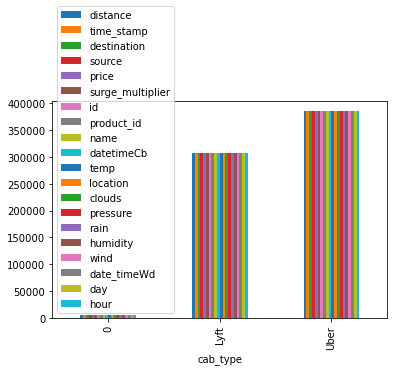

In [20]:
df.groupby('cab_type').count().plot.bar()

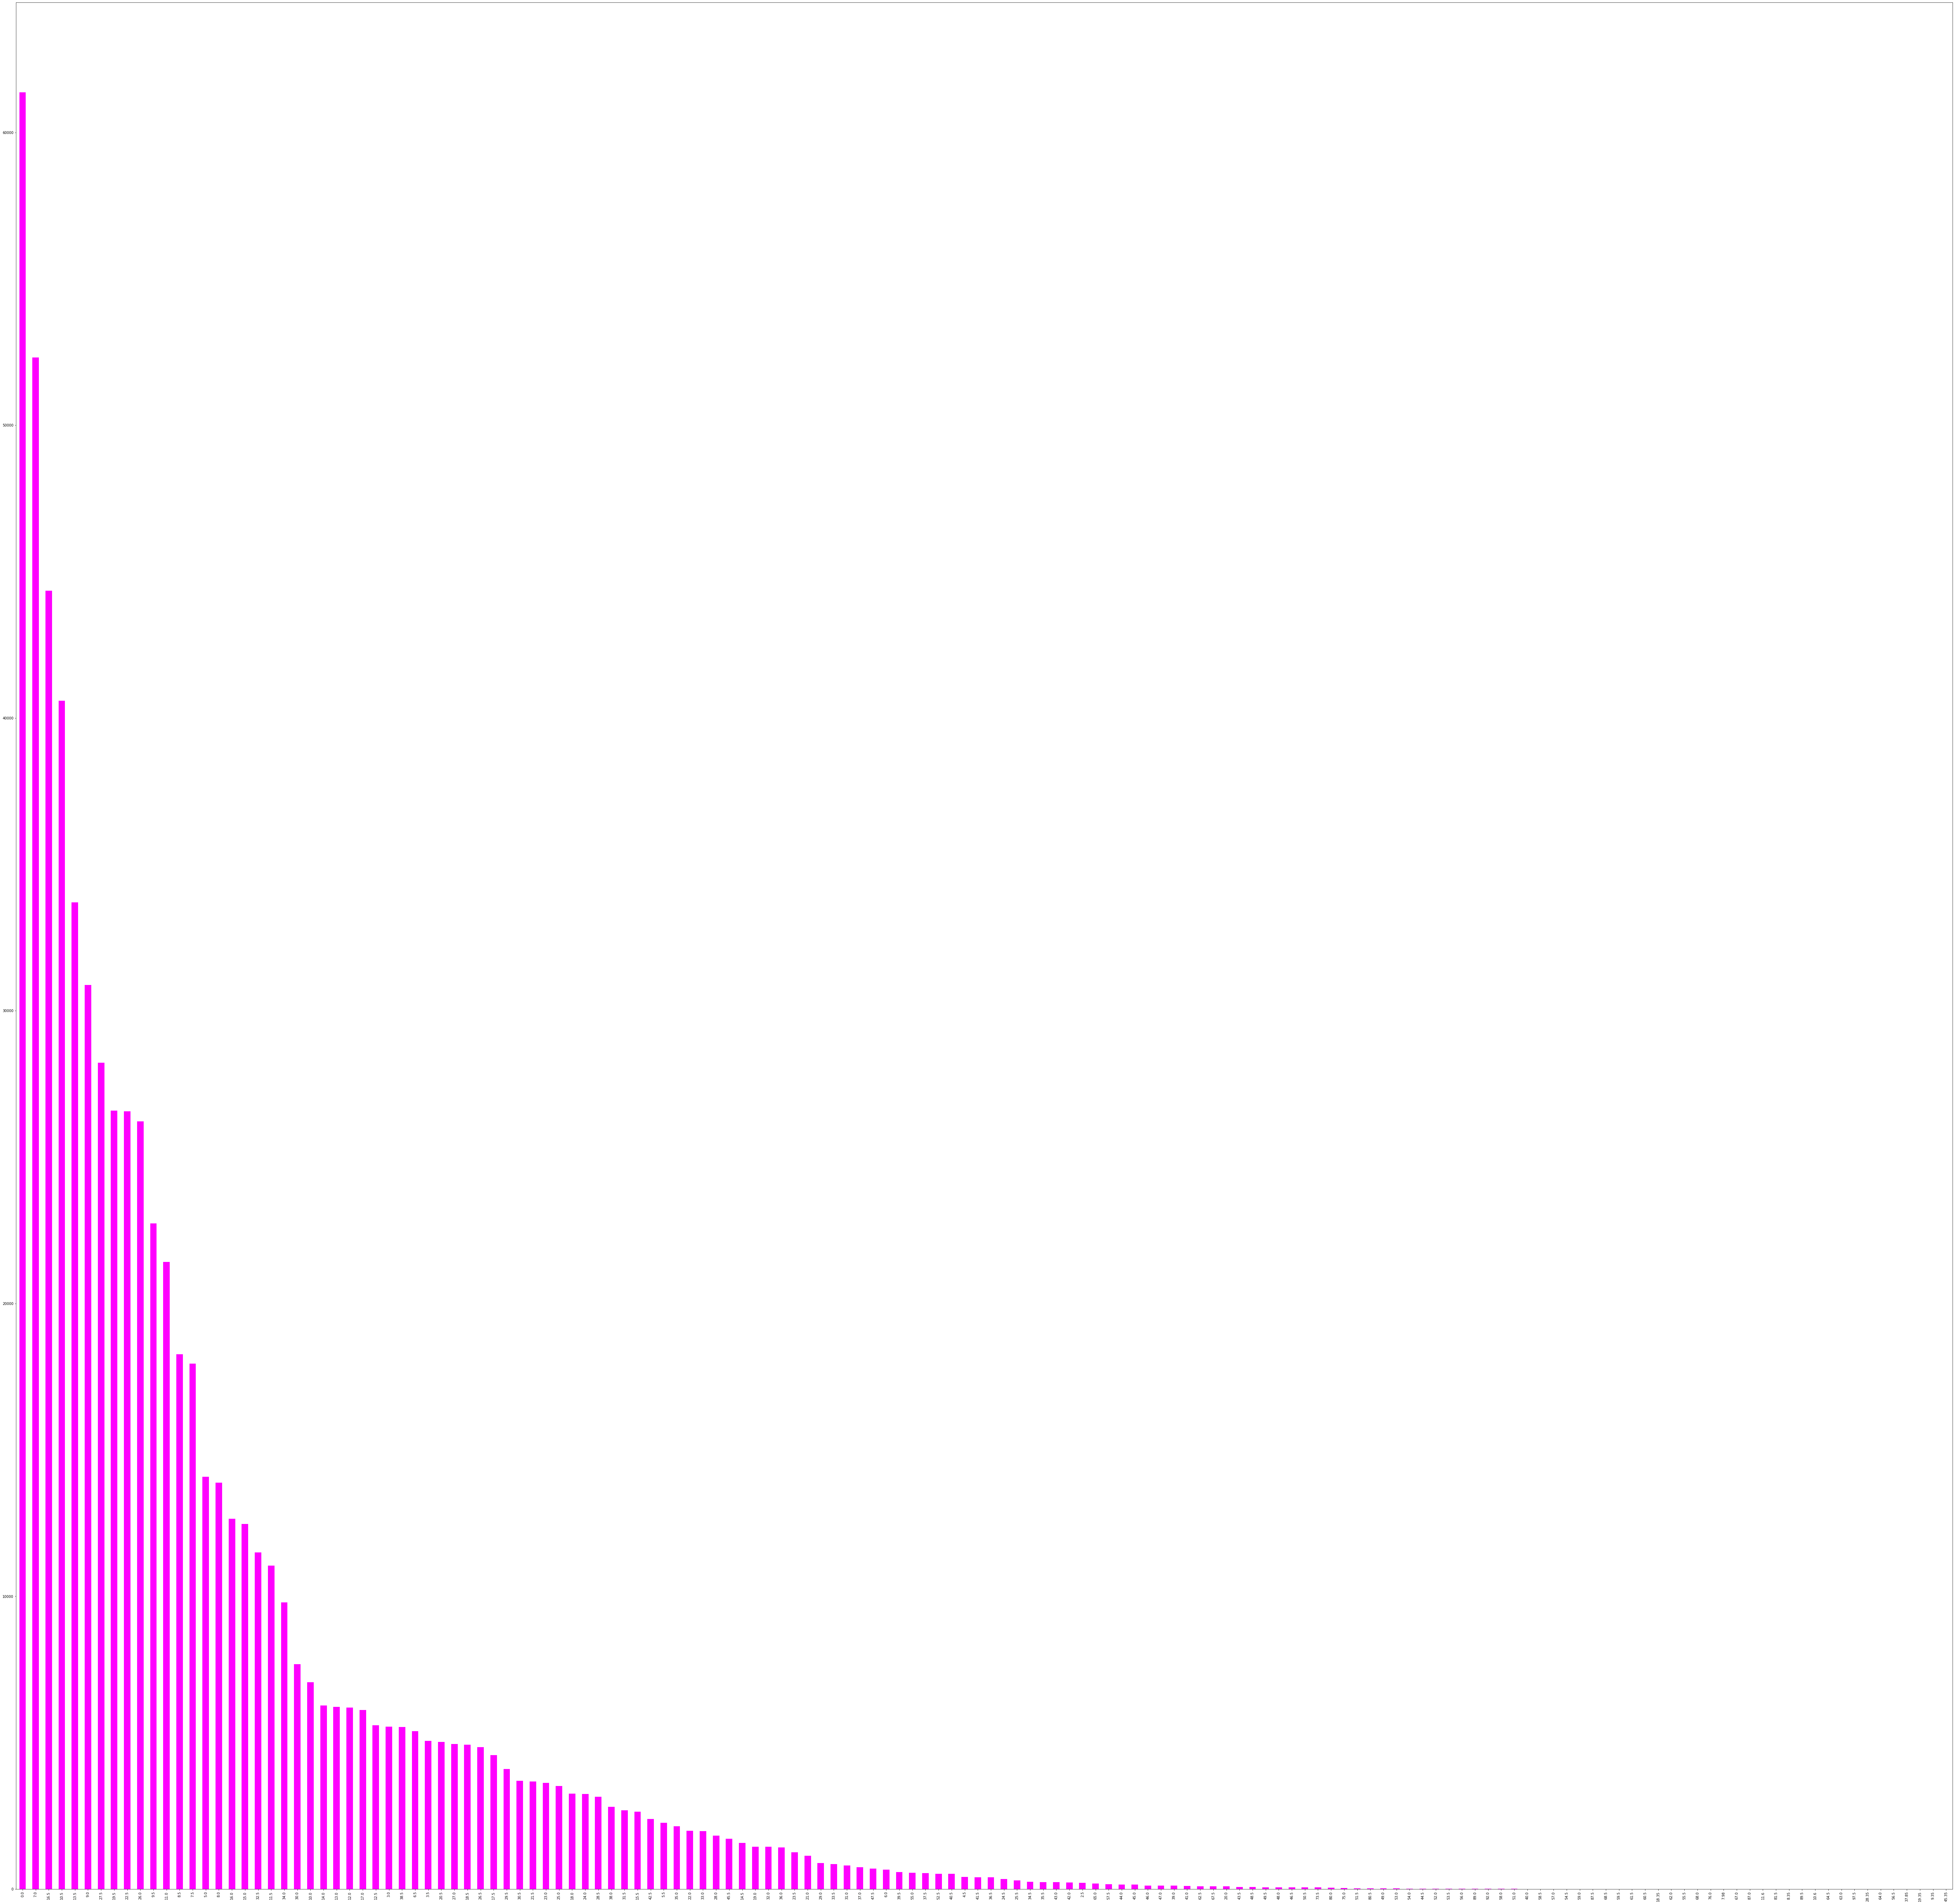

In [21]:
df['price'].value_counts().plot(kind='bar',figsize=(100,100), color='magenta')

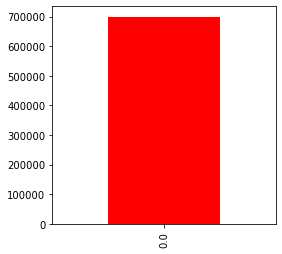

In [23]:
df['hour'].value_counts().plot(kind='bar',figsize=(4,4), color='red')


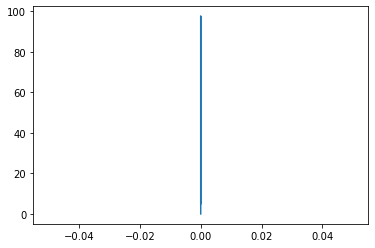

In [25]:

x=df['hour']
y=df['price']
plt.plot(x,y)
plt.show()

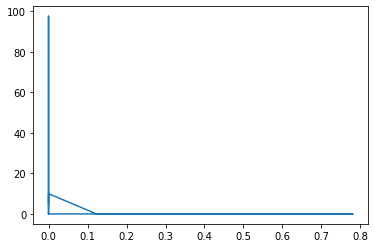

In [26]:
x=df['rain']
y=df['price']
plt.plot(x,y)
plt.show()

# PREDICTION MODEL / MACHINE LEARNING

In [27]:
df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetimeCb', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_timeWd', 'day', 'hour'],
      dtype='object')

In [41]:
x1=df[['distance','temp','clouds', 'pressure','humidity', 'wind','rain','day', 'hour','surge_multiplier']]
y1=df['price']

In [42]:
#using skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split
#Split data into training and testing sets
x_train, y_train, x_test, y_test = train_test_split(x1, y1, test_size = 0.25, random_state=42)

In [50]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train,x_test)
linear

LinearRegression()

In [48]:
predictions=linear.predict(y_train)
predictions

array([32.54791635, 14.75560763, 16.81696874, ..., 11.82898384,
       11.85443274, 13.22867348])

In [47]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df

,Actual,Predicted
81607,42.5,32.547916
354,0.0,14.755608
471801,32.5,16.816969
407645,27.5,10.480192
474760,27.5,10.556539
...,...,...
538489,7.5,10.709232
579511,13.5,15.519075
5421,9.0,11.828984
279982,8.0,11.854433


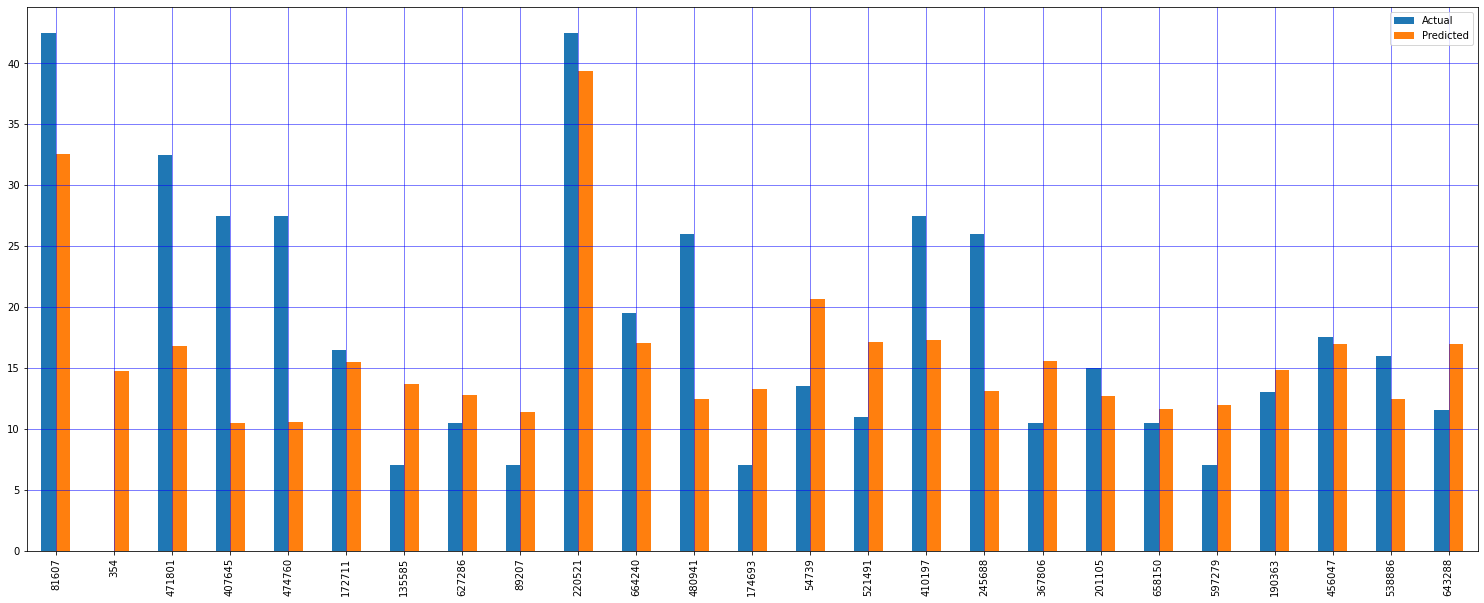

In [52]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.show()